___

___
# Linear Regression Project

Congratulations! You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!



## Imports


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 



In [4]:
df = pd.read_csv("Ecommerce Customers")

In [5]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [6]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


## Exploratory Data Analysis

**Let's explore the data!**



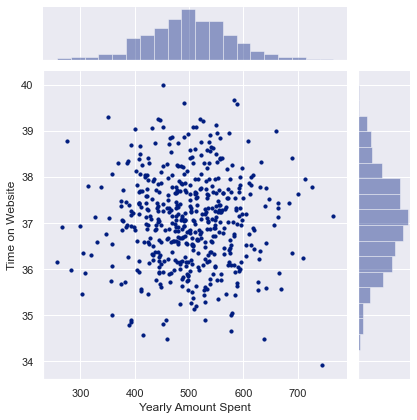

In [8]:
sns.set(style="whitegrid")
sns.set(palette= "dark")
sns.jointplot(x = df['Yearly Amount Spent'], y = df['Time on Website'], data = df , s = 10)

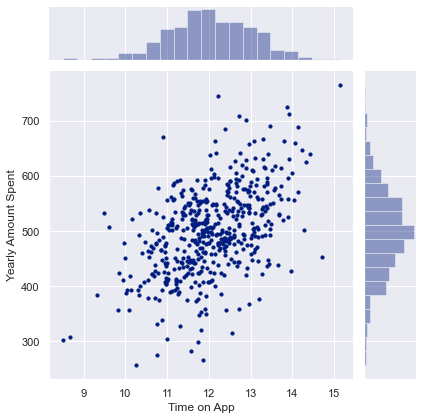

In [11]:
sns.jointplot(y= df["Yearly Amount Spent"] , x = df["Time on App"],data = df, s = 10)

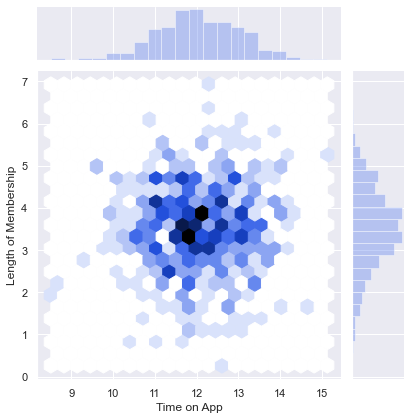

In [12]:
sns.set(style="whitegrid")
sns.set(palette= "coolwarm")
sns.jointplot(kind='hex', y = df["Length of Membership"] , x = df["Time on App"],data=df)

**Let's explore these types of relationships across the entire data set.

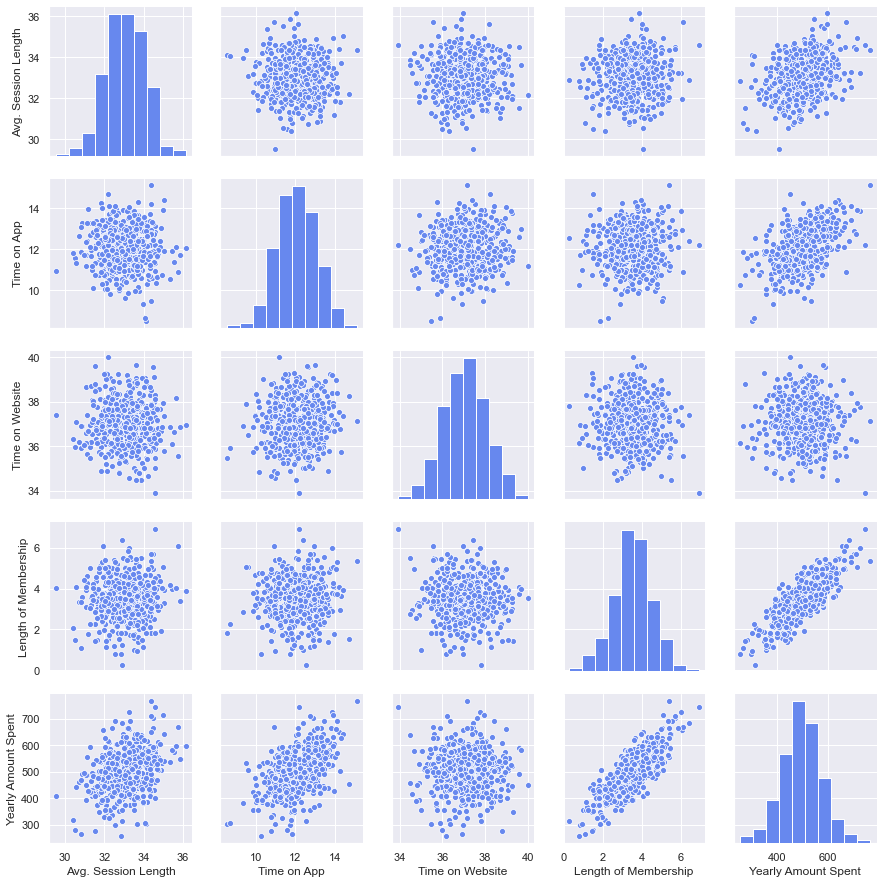

In [13]:
sns.pairplot(df)

In [24]:
#Length of Membership

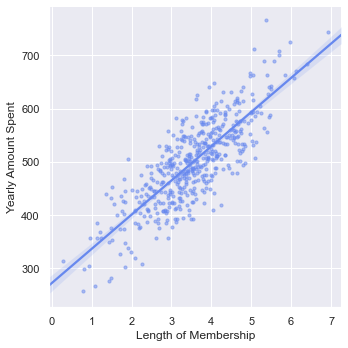

In [14]:
sns.lmplot(x = "Length of Membership", y = "Yearly Amount Spent",data= df ,scatter_kws={'s':10,'alpha':0.5})

## Training and Testing Data



In [15]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [16]:
x = df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

.


In [22]:

from sklearn.model_selection import train_test_split

In [24]:
X_train ,X_test, Y_train ,Y_test = train_test_split(x,y, test_size = 0.4)

In [43]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 241 to 158
Data columns (total 4 columns):
Avg. Session Length     200 non-null float64
Time on App             200 non-null float64
Time on Website         200 non-null float64
Length of Membership    200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


## Training the Model



In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
lm = LinearRegression()

In [49]:
lm.fit(X_train,Y_train)

LinearRegression()

In [51]:
print(lm.coef_)

[25.70429202 38.70378461  0.54601378 61.62363303]


In [58]:
coeff_df = pd.DataFrame(lm.coef_  ,x.columns, columns =['coef'] )
coeff_df

,coef
Avg. Session Length,25.704292
Time on App,38.703785
Time on Website,0.546014
Length of Membership,61.623633


## Predicting Test Data


In [66]:
y_pridicted = lm.predict(X_test)

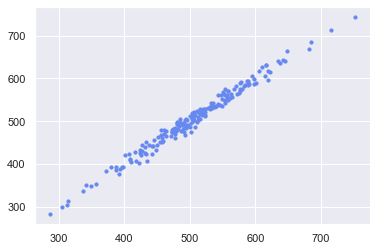

In [62]:
plt.scatter(lm.predict(X_test), Y_test , s=10)

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).



In [68]:
from sklearn import metrics
print("MAE:  " , metrics.mean_absolute_error(Y_test, y_pridicted))

MAE:   7.9612316050870096


In [69]:
print("RMSE:  " , np.sqrt(metrics.mean_squared_error(Y_test,y_pridicted)))

RMSE:   9.91053620989529


## Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 



<AxesSubplot:xlabel='Yearly Amount Spent'>

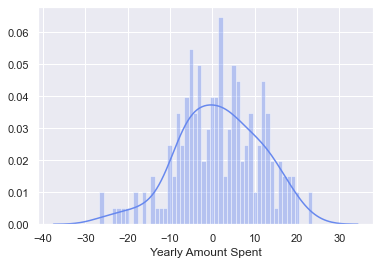

In [72]:
sns.distplot((Y_test-y_pridicted),bins=50)

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.



In [73]:
coeff_df = pd.DataFrame(lm.coef_  ,x.columns, columns =['coef'] )
coeff_df

,coef
Avg. Session Length,25.704292
Time on App,38.703785
Time on Website,0.546014
Length of Membership,61.623633


**Do you think the company should focus more on their mobile app or on their website?**

*time on app*